In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


%matplotlib inline

In [2]:
df_avo = pd.read_csv("avoN.csv")


In [3]:
df_avo.head(15)

,Unnamed: 0,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [24]:
X = df_avo['AveragePrice']
Y = df_avo['Total Bags'] 

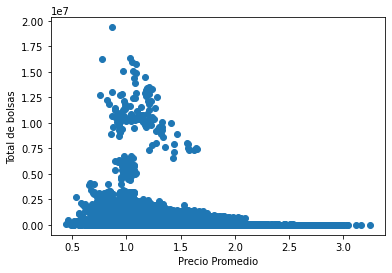

In [84]:
plt.scatter(X, Y) 
plt.xlabel("Precio Promedio")
plt.ylabel("Total de bolsas")
plt.show()

In [32]:
explicativas = df_avo[['AveragePrice']]
objetivo = df_avo[['Total Bags']]

In [34]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [40]:
model.fit(X = explicativas, y = objetivo)

LinearRegression()

In [42]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['AveragePrice'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[-433726.82363677]]),
 '_residues': array([1.71927342e+16]),
 'rank_': 1,
 'singular_': array([54.39562625]),
 'intercept_': array([849449.7518338])}

In [88]:
y_pred = model.predict(X = df_avo[['AveragePrice']])

In [79]:
df_avo.insert(0, 'predi', y_pred)

In [81]:
df_avo.head(5)

,predi,pred,Unnamed: 0,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,272593.076397,272593.076397,0,2015-12-27,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,263918.539924,263918.539924,1,2015-12-20,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,446083.805852,446083.805852,2,2015-12-13,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,381024.782306,381024.782306,3,2015-12-06,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,294279.417579,294279.417579,4,2015-11-29,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


<AxesSubplot:xlabel='AveragePrice', ylabel='Total Bags'>

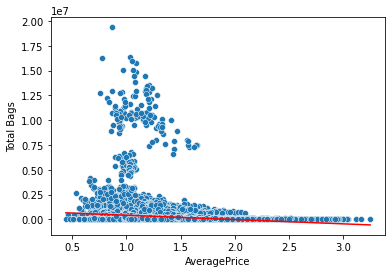

In [82]:
sns.scatterplot(x='AveragePrice', y='Total Bags', data = df_avo)
sns.lineplot(x='AveragePrice', y='predi', data = df_avo, color = 'red')